In [1]:
# Notebook for processing raw data 
# Selects only triggers and releases
# Load data
import numpy as np
import matplotlib.pyplot as plt
from peratouch.config import data_dir
from peratouch.preprocessing import TriggersAndReleases
# Width of triggers 
width = 32 
path = data_dir / "raw_npz" / "five_users_data.npz"
data = np.load((path))


USER U0
Signal shape: (2978500,)
Excluded noisy triggers: (176, 32)
Excluded short triggers: (193, 32)
Included clean triggers: (7578, 32)
Included clean releases: (7578, 32)

USER U1
Signal shape: (2978500,)
Excluded noisy triggers: (339, 32)
Excluded short triggers: (304, 32)
Included clean triggers: (5977, 32)
Included clean releases: (5977, 32)

USER U2
Signal shape: (2978500,)
Excluded noisy triggers: (263, 32)
Excluded short triggers: (676, 32)
Included clean triggers: (6108, 32)
Included clean releases: (6108, 32)

USER U3
Signal shape: (2978500,)
Excluded noisy triggers: (1433, 32)
Excluded short triggers: (30, 32)
Included clean triggers: (5637, 32)
Included clean releases: (5637, 32)

USER U4
Signal shape: (2978500,)
Excluded noisy triggers: (419, 32)
Excluded short triggers: (226, 32)
Included clean triggers: (5790, 32)
Included clean releases: (5790, 32)


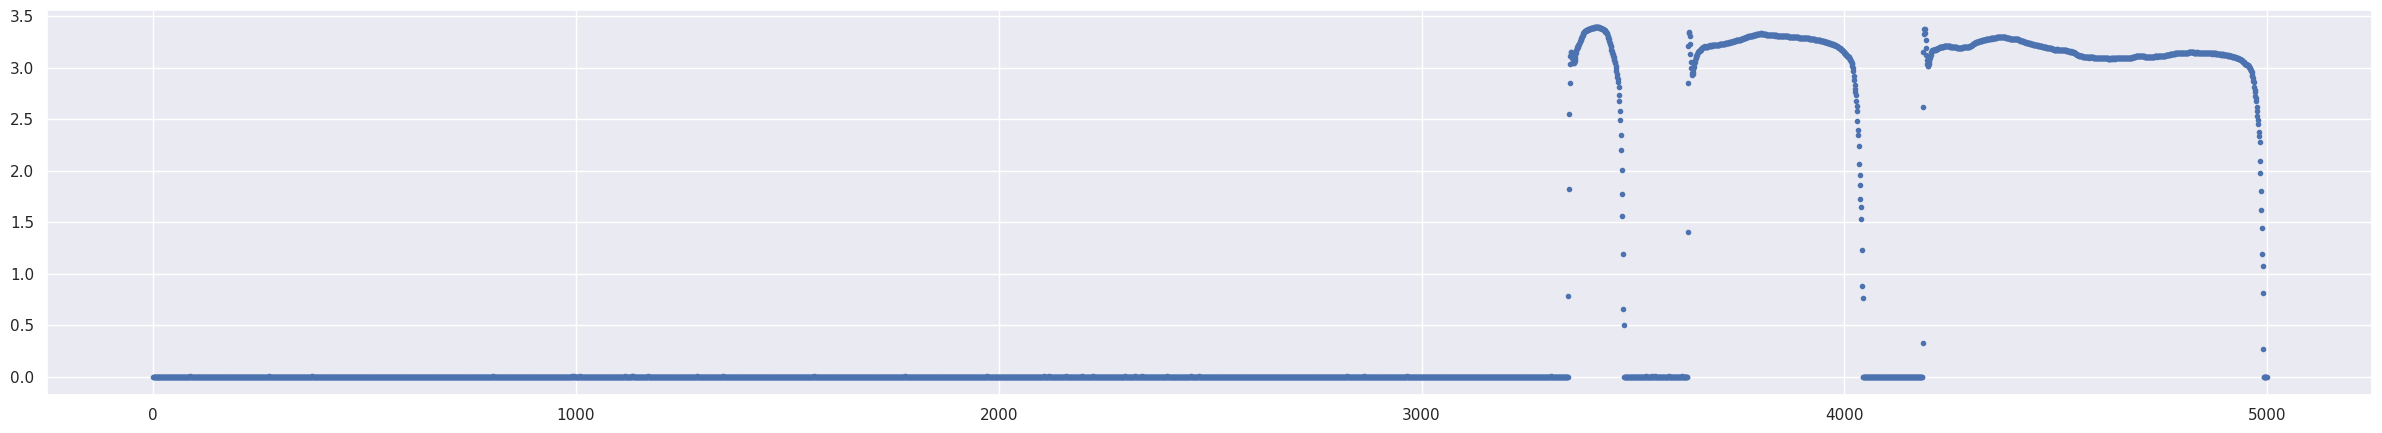

In [2]:
# Look at a few triggers of one of the users
key = list(data.keys())[0] 
TR = TriggersAndReleases(data)
TR.plot_signal(key)
TR.run()

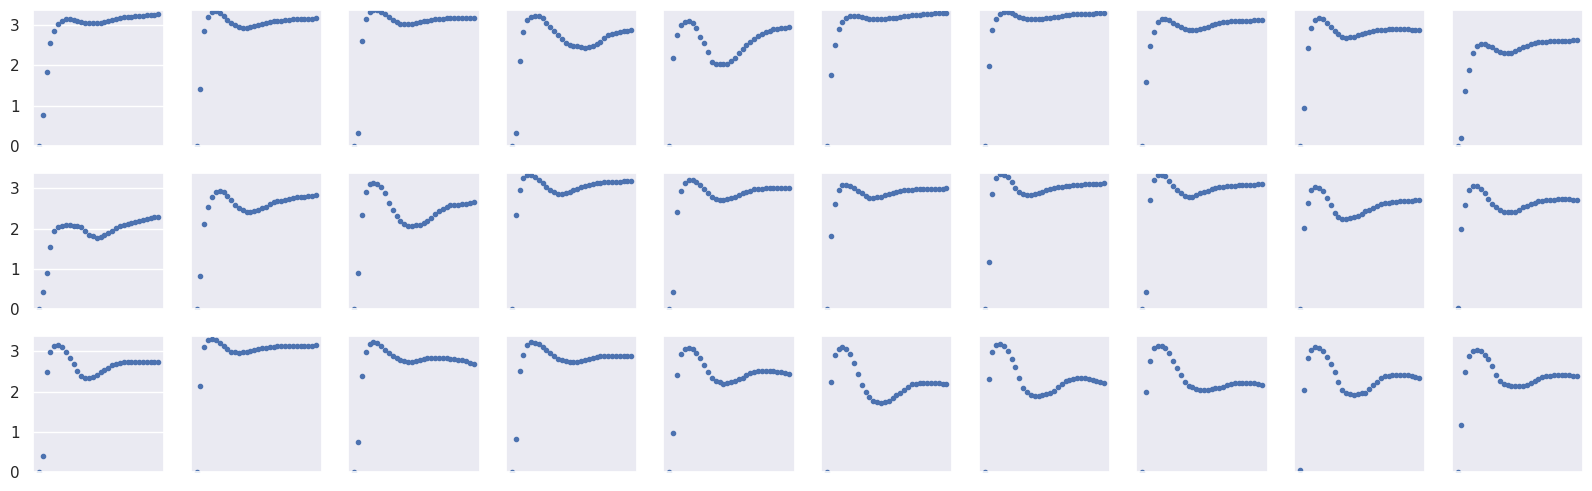

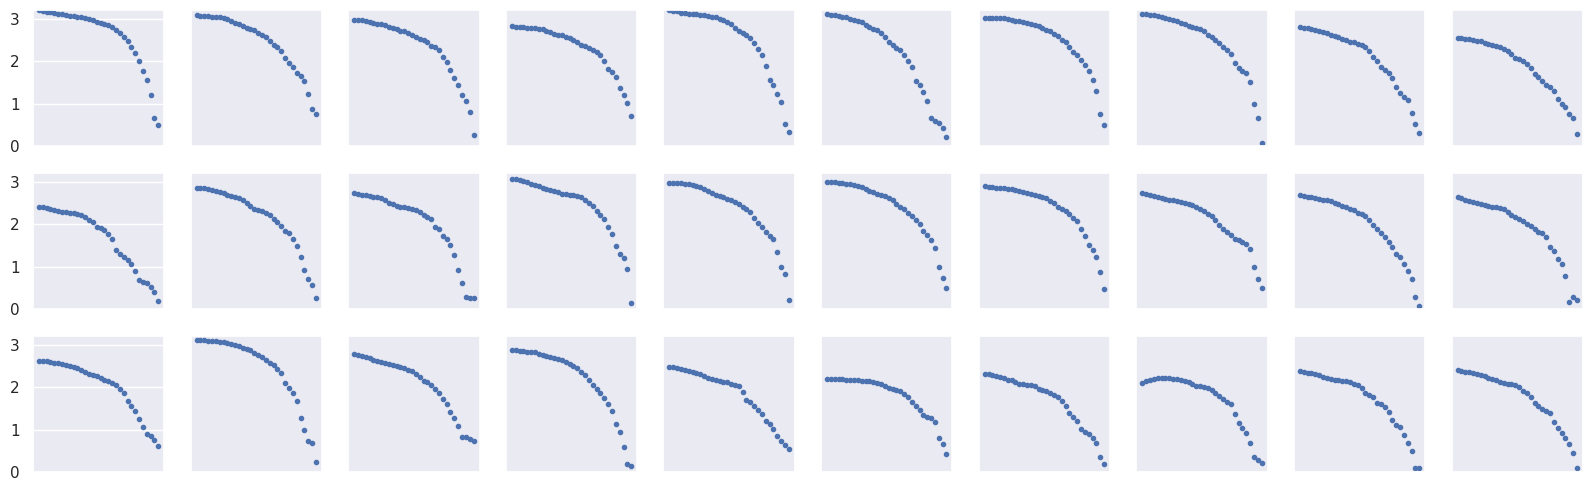

In [3]:
TR.plot_clean(key)

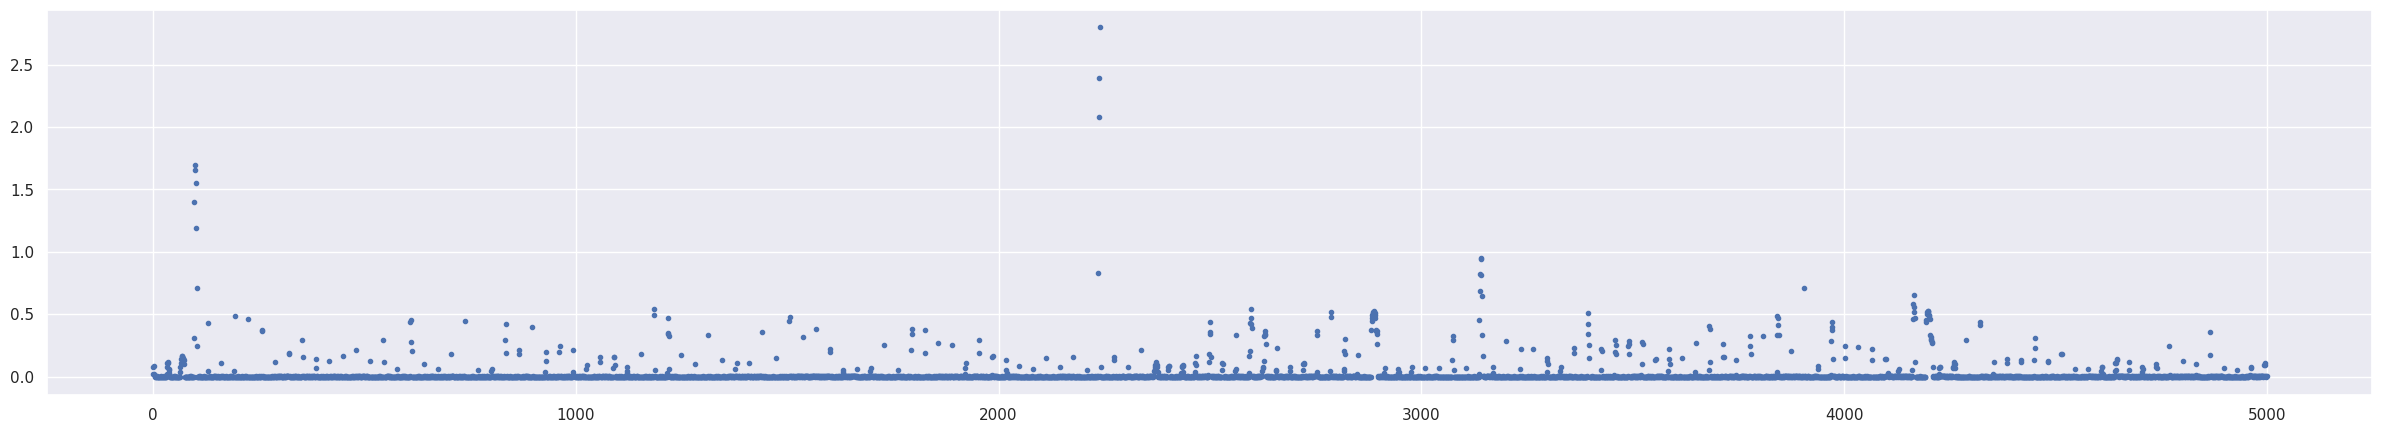

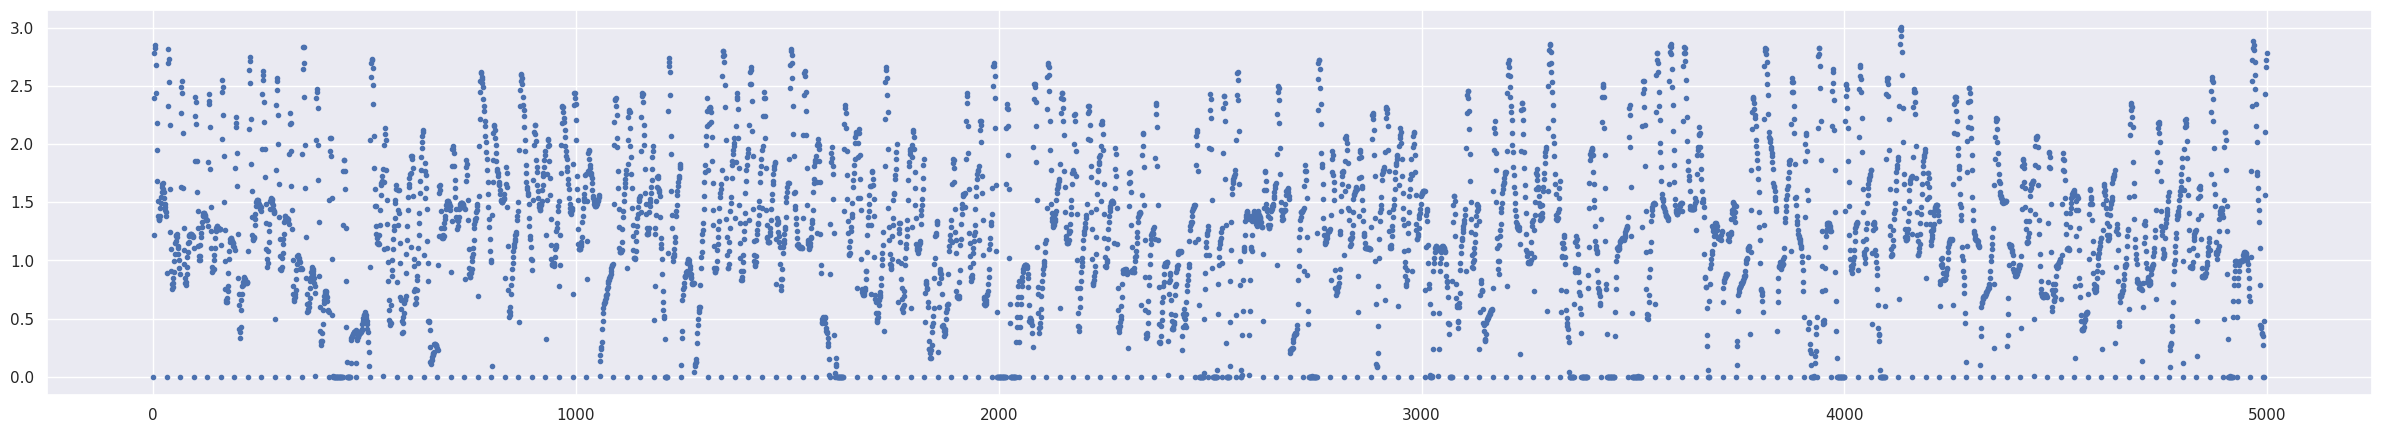

In [4]:
TR.plot_discarded(key)

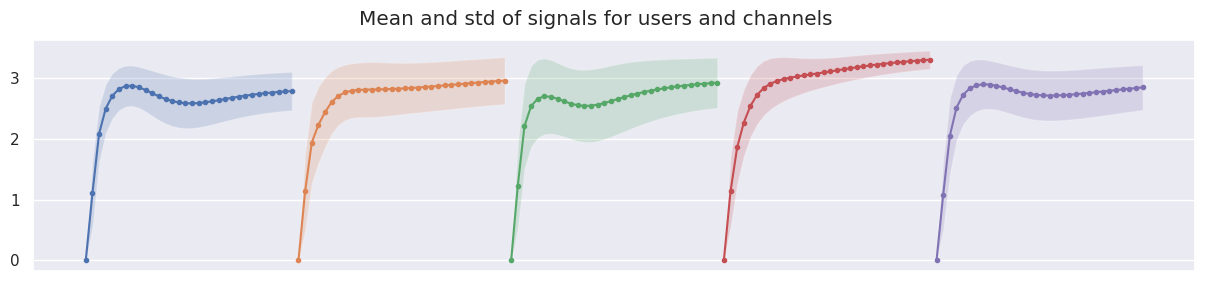

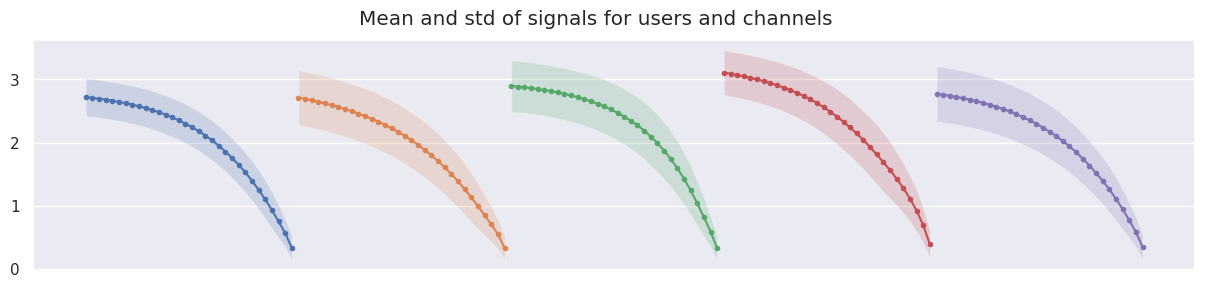

In [5]:
# Compare the mean and std of the signals for all the users involved
TR.plot_means_std()

In [5]:
# Save file
filename = path.name.split(".")[0] + "_window" + f"_{TR.get_triggers()[key].shape[1]}.npz"
save_path = data_dir / "processed" / filename
TR.save_dict(save_path)




Saved U0_triggers : (7578, 32)
Saved U0_releases : (7578, 32)
Saved U1_triggers : (5977, 32)
Saved U1_releases : (5977, 32)
Saved U2_triggers : (6108, 32)
Saved U2_releases : (6108, 32)
Saved U3_triggers : (5637, 32)
Saved U3_releases : (5637, 32)
Saved U4_triggers : (5790, 32)
Saved U4_releases : (5790, 32)

Saved file in /home/guijmp/dev/Masters_Project/data/processed/five_users_data_window_32.npz
